# Preamble

importing

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs


In [4]:
from math import floor, ceil

def adjust_bounds(xmin, xmax, ymin, ymax):
    xmin, ymin = floor(xmin), floor(ymin)
    xmax, ymax = ceil(xmax + .1*abs(xmax)), ceil(ymax + .1*abs(ymax))
    return xmin, xmax, ymin, ymax

def plot_probabilities(classifier, X, y, cmap, levels = 10):
    xs, ys =  X[:, 0], X[:, 1]
    xmin, xmax, ymin, ymax = adjust_bounds(xs.min(), xs.max(), ys.min(), ys.max())
    xx, yy = np.meshgrid(np.arange(xmin, xmax, .1), np.arange(ymin, ymax, .1))
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap = 'viridis', levels = levels)
    plt.colorbar()
    plt.scatter(xs, ys, c=y, cmap=cmap)


Making test data

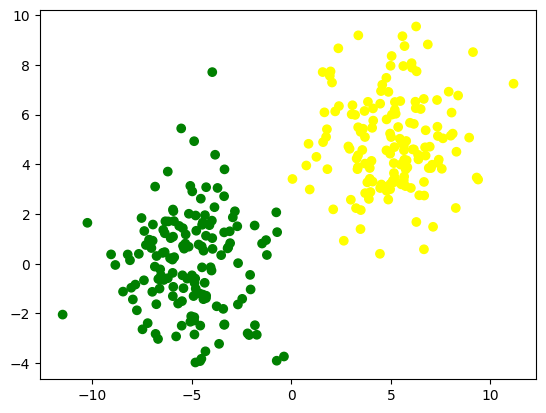

In [5]:
centers_full=[[-5, 0], [5, 5], [5, -5]]
colors_full = ["green", "yellow", "magenta"]
blobs = make_blobs(centers=centers_full[:2], cluster_std= 2, n_samples=300, random_state=42)

X, y = blobs

colors = ListedColormap(colors_full[:2])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Fitting Logistic Regression

Creating and fitting on the training data.

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, C=10, fit_intercept=False)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10, fit_intercept=False, random_state=42)

The position in the center is predicted to be green...

In [8]:
log_reg.predict([[0, 0]])

array([0])

... but only with 51.4% certainty.

In [9]:
log_reg.predict_proba([[0, 0]])


array([[0.5, 0.5]])

In [10]:
log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(1.0, 1.0)

This plot shows the areas of uncertainty. Note, that most of the points are in either the 1.0 or the 0.0 area.

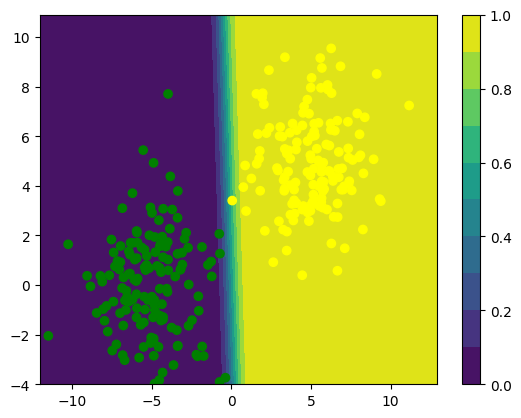

In [11]:
plot_probabilities(log_reg, X, y, colors)


# With overlap

Let's see how this works in a noisier example with more overlap between the categories

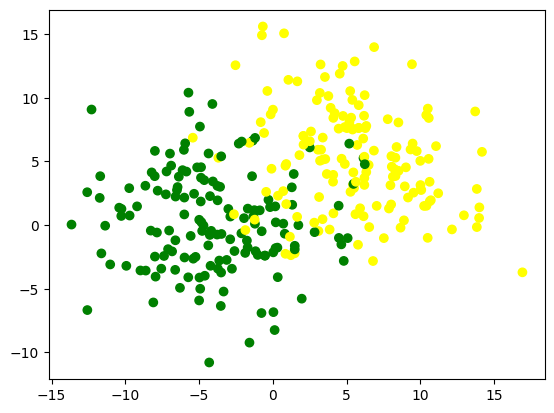

In [12]:
blobs = make_blobs(centers=centers_full[:2], cluster_std= 4, n_samples=300, random_state=504)

X, y = blobs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=504)

colors = ListedColormap(colors_full[:2])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [13]:
log_reg = LogisticRegression(random_state=504)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=504)

In [14]:
log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(0.8977777777777778, 0.9066666666666666)

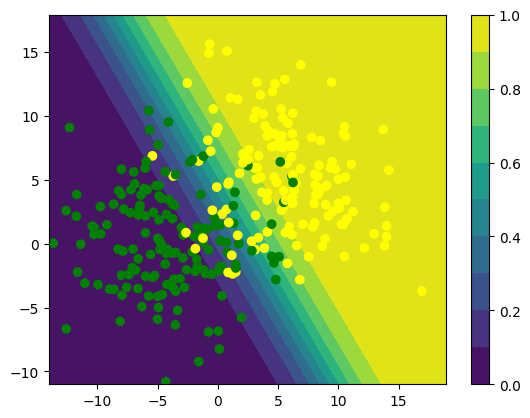

In [15]:
plot_probabilities(log_reg, X, y, colors)

# Mutiple categories



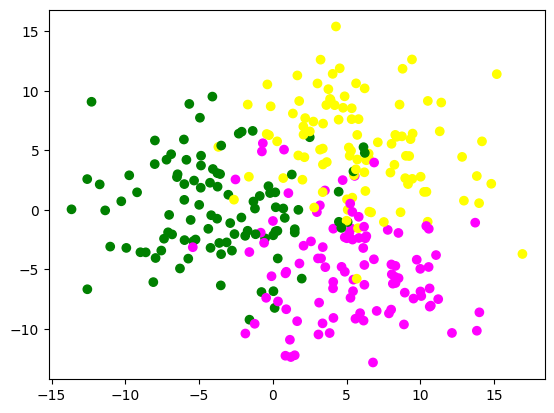

In [16]:
blobs = make_blobs(centers=centers_full, cluster_std= 4, n_samples=300, random_state=504)

X, y = blobs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=504)

colors = ListedColormap(colors_full)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


In [17]:
log_reg = LogisticRegression(C=30, random_state=504, fit_intercept=False)
log_reg.fit(X_train, y_train)


LogisticRegression(C=30, fit_intercept=False, random_state=504)

In [18]:

log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(0.84, 0.7333333333333333)

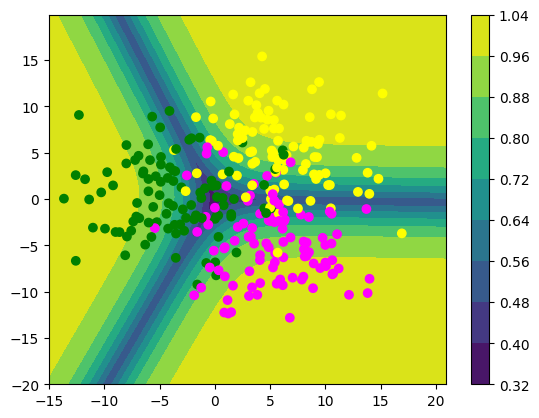

In [19]:
xx, yy = np.meshgrid(np.arange(-15, 21, .1), np.arange(-20, 20, .1))
Z = np.array([max(p) for p in log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])])
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap = 'viridis', levels = 10)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

# Non-linear data

This shouldn't be possible. Let's see how bad it is.

First some datasets.

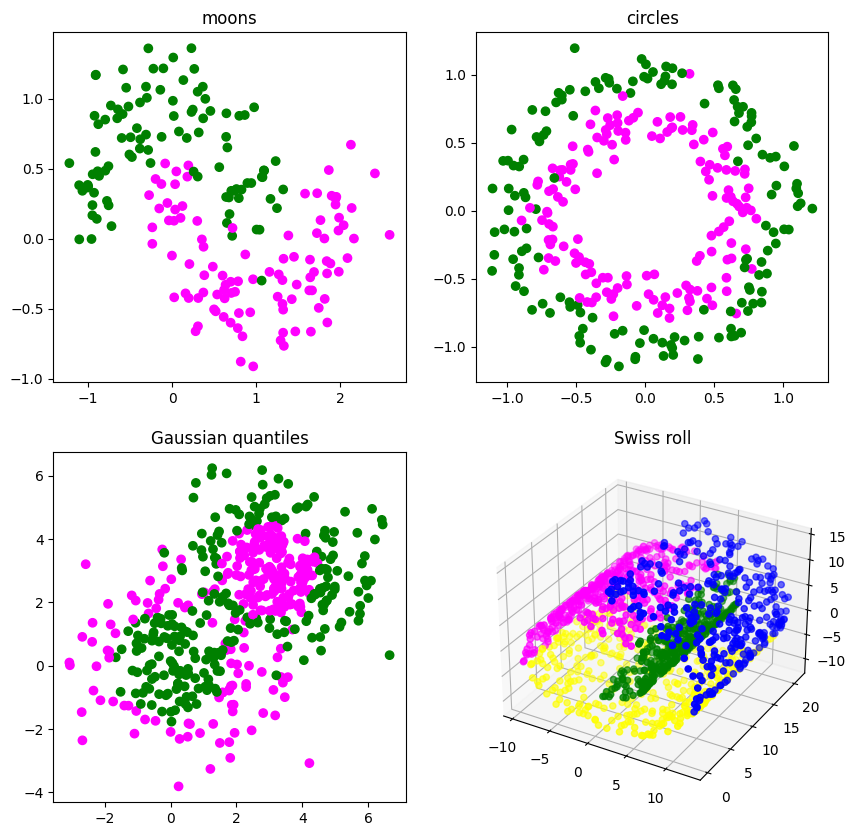

In [20]:
from sklearn.datasets import make_moons, make_circles, make_gaussian_quantiles, make_swiss_roll
from math import floor, ceil
import mpl_toolkits.mplot3d.axes3d as p3

colors = ListedColormap(['green', 'magenta', 'yellow', 'blue'])

X_moons, y_moons = make_moons(n_samples=200, noise = .2, random_state = 504)
X_circles, y_circles = make_circles(n_samples=300, factor=.65, noise = .1)
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=504)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=504)
X_quan = np.concatenate((X1, X2))
y_quan = np.concatenate((y1, - y2 + 1))

X_swiss, y_swiss = make_swiss_roll(n_samples = 1500, noise = 0.05, random_state=504)

y_min = y_swiss.min()
y_max = y_swiss.max()
y_scale = ceil(y_max - y_min)

y_swiss = np.array([floor(4 * (y - y_min) / y_scale) for y in y_swiss])

figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(2, 2, 1, title='moons')
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=ListedColormap(['green', 'magenta']))

ax = figure.add_subplot(2, 2, 2, title='circles')
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap=ListedColormap(['green', 'magenta']))

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
ax.scatter(X_quan[:, 0], X_quan[:, 1], c=y_quan, cmap=ListedColormap(['green', 'magenta']))

ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=y_swiss, cmap=colors)


If you look carefully at the Swiss roll, you'll see that each color is somewhat linearly seperable from the rest of the colors in 3D.



### Moons

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=504)
log_reg = LogisticRegression(C=100, random_state=504)
log_reg.fit(X_train, y_train)

log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(0.8533333333333334, 0.9)

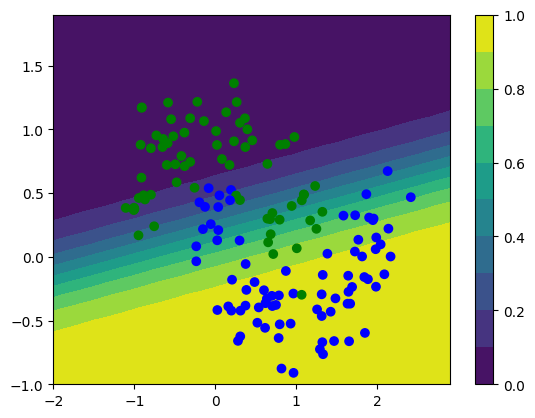

In [22]:
plot_probabilities(log_reg, X_train, y_train, colors)

The default settings are rather bad here, but you can get better results with a higher C (why is that?).

### Circles

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, random_state=504)
log_reg = LogisticRegression(random_state=504)
log_reg.fit(X_train, y_train)

log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(0.6088888888888889, 0.49333333333333335)

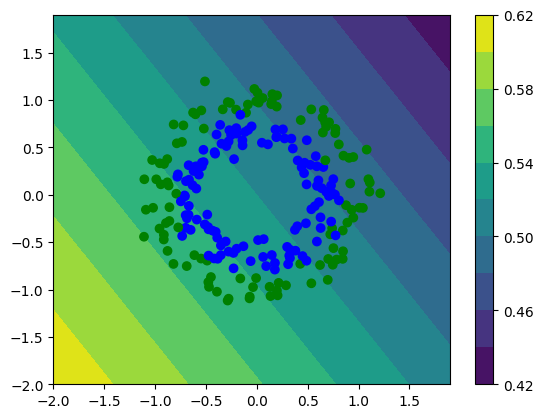

In [24]:
plot_probabilities(log_reg, X_train, y_train, colors)

This is a lost cause. You will need to manipulate the data somehow. Either polar coordinates or artificial dimensions.

### Gaussian quantiles

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_quan, y_quan, random_state=504)
log_reg = LogisticRegression(random_state=504)
log_reg.fit(X_train, y_train)

log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(0.5866666666666667, 0.496)

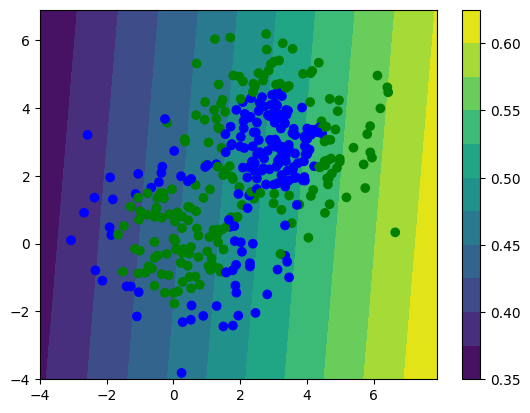

In [26]:
plot_probabilities(log_reg, X_train, y_train, colors)

Another lost cause.

### Swiss roll

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_swiss, y_swiss, random_state=504)
log_reg = LogisticRegression(C=30, random_state=504)
log_reg.fit(X_train, y_train)

log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9555555555555556, 0.968)

On default settings, it runs out of iterations. But note that it already found a pretty good result.